#Grupo M


1.   Matheus Barreto

2.   

Kaggle: https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets/data

#Projeto Final



O Projeto Final dessa Disciplina consistirá na escolha de um Dataset e realização do treinamento de um modelo que resolva o dataset escolhido utilizando Redes Neurais (sem Convolução).

Você tem a liberdade de escolher qualquer dataset, entretanto, atente-se para a complexidade não ser mutio alta e você conseguir resolver sem utilização de redes profundas. Eu também listo abaixo alguns datasets interessantes que podem escolher, se desejarem:


##Must Do
1.   O carregamento do dataset e quaisquer manipulações que ache necessário fazer com os dados

2.   A definição do modelo de redes neurais utilizada para treinar o modelo

3.   O treinamento do modelo

4.   Uma análise simples da performance com no mínimo acurária e perda (ou pode adicionar outras métricas, como matriz de confusão, outros gráficos etc)

5.   Depois do treinamento, você deve escrever no mínimo um parágrafo explicando como foi o processo e sua experiência: quais dificuldades teve, se teve overfitting ou underfitting e se teve que fazer ajustes etc.

6. Fazer o upload desse notebook no seu repositório do GitHub, dentro de uma pasta chamada "Trabalho Final". Submeter o link para o arquivo no Github nessa entrega.


##  Importações / Instalações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


#(1) Carregamento do dataset

In [ ]:
from google.colab import drive

# Monta o Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_fruit = '/content/drive/MyDrive/Dataset/Date_Fruit_Datasets.xlsx'
df = pd.read_excel(file_path_fruit)

print(df.head())

     AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   

   KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLdaub4RG  \
0      4.228

# (1.) Manipulação de dados

In [ ]:
# Verificar se há valores nulos
print(df.isnull().sum())


AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


In [ ]:
print("Shape do DataFrame:")
print(df.shape)

Shape do DataFrame:
(898, 35)


In [ ]:
df['Class'].value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

In [ ]:
print(df.dtypes)

AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR          int64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
Class             object
dtype: object


In [ ]:
desc_stats = df.describe()
print(desc_stats)

                AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947    0.053745     17.820778  ...   

In [ ]:
# Verificação de valores NA
missing_counts = df.isna().sum()
print("Quantidade de valores ausentes por coluna:\n", missing_counts)

Quantidade de valores ausentes por coluna:
 AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


In [ ]:
df['Class']

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

##Padronização dos dados

In [ ]:
# Padronizar as colunas numéricas
numeric_columns = df.columns.difference(['Class'])
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Codificar a variável Class
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Verificar os dados após a padronização e codificação
print(df.head())
print(df['Class'].unique())

       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  1.155640   0.783942    0.604507    1.311643     -1.129568  1.075704   
1  0.371700   0.067067   -0.187473    0.869789     -1.899771  0.431437   
2  2.132265   1.439131    1.319121    1.921899     -0.993119  1.794103   
3  1.098729   0.716350    0.535970    1.308399     -1.250230  1.031228   
4  0.459641   0.250603    0.091511    0.761463     -1.025822  0.507425   

   SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0  0.708628     1.108752  0.871873     -0.046797  ...   -0.349683   -0.575281   
1  0.857410     0.323373  0.804852     -0.051373  ...   -0.562154   -0.661407   
2  0.791285     2.069149  0.547942     -0.045820  ...   -0.171667   -0.333868   
3  0.714138     1.051992  0.737832     -0.047612  ...    0.274066    0.935707   
4  0.493720     0.431717  0.384115     -0.046056  ...   -0.534895   -0.570286   

   KurtosisRB  EntropyRR  EntropyRG  EntropyRB  ALLdaub4RR  ALLdaub4

##Remoção de colunas desnecessárias

In [ ]:
columns_to_remove_low_variance = ['SkewRB', 'SkewRR', 'SkewRG',
                   'KurtosisRB', 'KurtosisRR', 'KurtosisRG',
                   'EntropyRB', 'EntropyRR', 'EntropyRG', 'SHAPEFACTOR_2', 'SOLIDITY', 'SHAPEFACTOR_1', 'SHAPEFACTOR_4']

df_clean = df.drop(columns=columns_to_remove_low_variance)

print(f"Colunas removidas: {columns_to_remove_low_variance}")
print(f"Dimensões do dataframe original: {df.shape}")
print(f"Dimensões do dataframe reduzido: {df_reduced.shape}")


Colunas removidas: ['SkewRB', 'SkewRR', 'SkewRG', 'KurtosisRB', 'KurtosisRR', 'KurtosisRG', 'EntropyRB', 'EntropyRR', 'EntropyRG', 'SHAPEFACTOR_2', 'SOLIDITY', 'SHAPEFACTOR_1', 'SHAPEFACTOR_4']
Dimensões do dataframe original: (898, 35)
Dimensões do dataframe reduzido: (898, 22)


##A definição do modelo de redes neurais utilizada para treinar o modelo / O treinamento do modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
X = df_clean.drop(columns=['Class'])
y = df_clean['Class']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout para evitar overfitting

# Adicionar mais uma camada oculta
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Adicionar a camada de saída
model.add(Dense(len(df_clean['Class'].unique()), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1408      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                 231       
                                                                 
Total params: 3719 (14.53 KB)
Trainable params: 3719 (14.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Treinamento do modelo

epochs=50: Define o número de vezes que o modelo será treinado com o conjunto de dados completo.

batch_size=32: Especifica o número de amostras que serão usadas para atualizar os pesos do modelo a cada iteração durante o treinamento.

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 1.7391 - accuracy: 0.3802 - val_loss: 1.3135 - val_accuracy: 0.6444
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 1.2681 - accuracy: 0.5975 - val_loss: 0.9517 - val_accuracy: 0.6667
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.9783 - accuracy: 0.6546 - val_loss: 0.7628 - val_accuracy: 0.7222
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.7033 - val_loss: 0.6567 - val_accuracy: 0.7333
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.7113 - accuracy: 0.7312 - val_loss: 0.5852 - val_accuracy: 0.7500
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.7577 - val_loss: 0.5416 - val_accuracy: 0.7722
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.7563 - val_loss: 0.5052 - val_accuracy: 0.7944
Epoch 8/50
23/23 [=

##Análise do Treinamento:
Progresso do Treinamento: Durante as 50 épocas de treinamento, a perda (loss) e a acurácia (accuracy) foram monitoradas tanto nos dados de treino quanto nos dados de validação (testes).


*   Performance do Modelo:
  
  *   A acurácia no conjunto de treino começou em cerca de 38% na primeira época e aumentou para aproximadamente 88% ao final das 50 épocas.
  *   A acurácia no conjunto de validação (testes) também mostrou um aumento gradual, começando em cerca de 64% na primeira época e chegando a 91% na última época.
  *   Isso indica que o modelo está aprendendo bem e generalizando para dados não vistos (dados de teste).

*   Curvas de Perda e Acurácia:
  
  *   As curvas de perda (loss) mostram uma diminuição constante tanto nos dados de treino quanto nos de validação, indicando que o modelo está melhorando sua capacidade de prever corretamente.
  *   As curvas de acurácia (accuracy) mostram um aumento gradual, o que é esperado à medida que o modelo aprende com os dados de treino e se ajusta aos dados de validação.

*   Overfitting:
  
  *   Não parece haver sinais claros de overfitting, já que as curvas de treino e validação seguem um padrão semelhante ao longo das épocas. O uso de dropout pode estar contribuindo para mitigar o overfitting.



Isso indica que o modelo está aprendendo bem e generalizando para dados não vistos (dados de teste).



In [ ]:
# Avaliar o modelo com os dados de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia do modelo nos dados de teste: {accuracy * 100:.2f}%')
print(f'Perda do modelo nos dados de teste: {loss:.4f}')


6/6 [==============================] - 0s 4ms/step - loss: 0.2718 - accuracy: 0.9056
Acurácia do modelo nos dados de teste: 90.56%
Perda do modelo nos dados de teste: 0.2718


##Visualização das métricas de treinamento

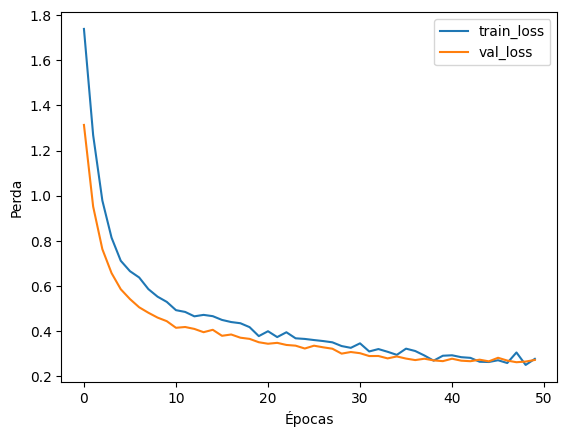

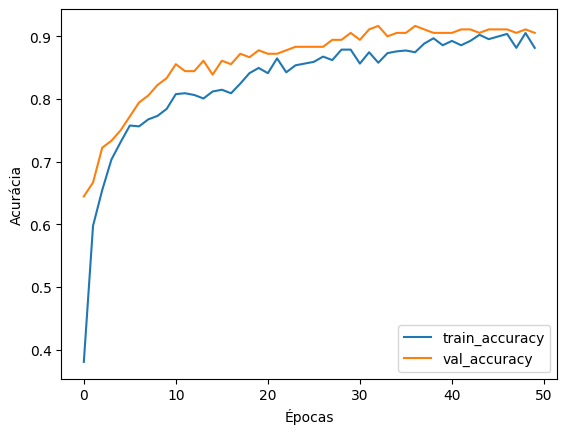

In [ ]:
import matplotlib.pyplot as plt

#perda
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

#acurácia
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


##Interpretação dos Resultados:
Progresso do Treinamento: Durante as 50 épocas de treinamento, a perda (loss) e a acurácia (accuracy) foram monitoradas tanto nos dados de treino quanto nos dados de validação (testes).


*   Acurácia: A acurácia de 90.56% significa que o modelo acertou corretamente em cerca de 90.56% dos exemplos nos dados de teste.
  
*   Perda: A perda de 0.2718 indica o quão bom foi o ajuste do modelo aos dados de teste, onde valores menores são melhores.


Analise da Matriz de Confusão

6/6 [==============================] - 0s 3ms/step


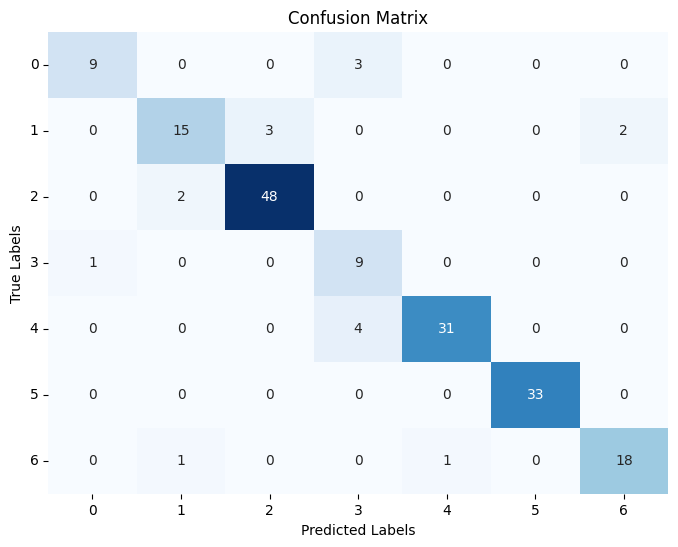

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 3. matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(df_clean['Class'].unique())) + 0.5,
           labels=df_clean['Class'].unique())
plt.yticks(ticks=np.arange(len(df_clean['Class'].unique())) + 0.5,
           labels=df_clean['Class'].unique(), rotation=0)
plt.show()


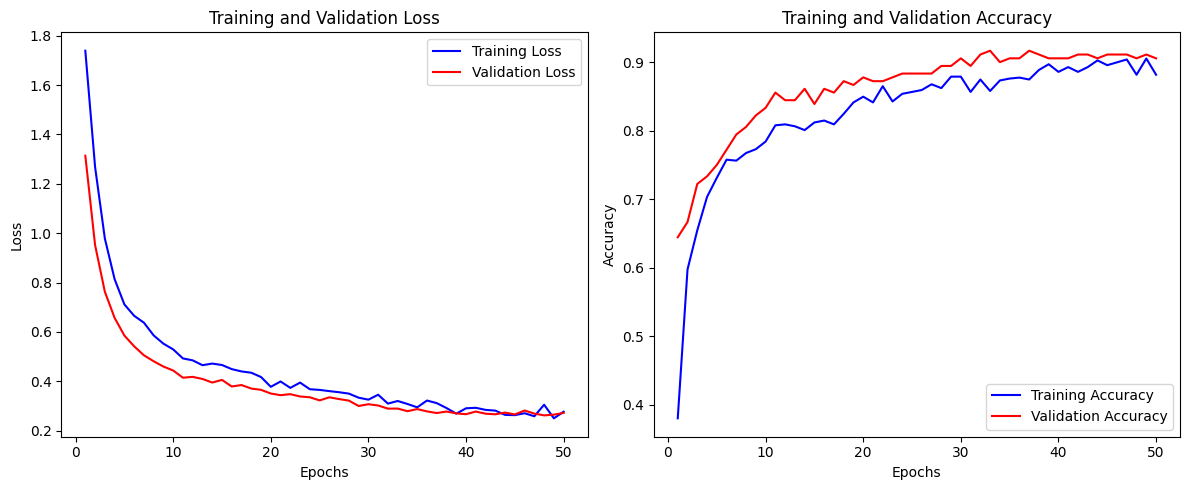

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Interpretação dos Gráficos:


Curva de Perda: Idealmente, queremos ver a perda de treinamento e validação diminuindo ao longo das épocas. Se a perda de validação começar a aumentar enquanto a perda de treinamento continua a diminuir, pode indicar overfitting.


Curva de Acurácia: Esperamos que a acurácia de treinamento e validação aumente com o tempo. Se a acurácia de validação ficar significativamente abaixo da acurácia de treinamento, pode indicar overfitting.

##Interpretação:
Curva de Acurácia:

O fato de a acurácia de validação não ter ficado abaixo da acurácia de treinamento é positivo.
Isso sugere que, apesar do aumento na perda de validação, o modelo ainda está fazendo previsões corretas na maioria dos casos nos dados de validação.
Uma acurácia de validação consistente e **alta indica que o modelo está generalizando bem.**

O aumento na perda de validação indica que o modelo pode não estar generalizando bem para novos dados após a época 47.
Isso pode ser devido ao modelo começar a memorizar os dados de treinamento em vez de aprender padrões gerais que se aplicam a novos dados.
Se o aumento não for muito abrupto e se a perda de treinamento continuar a diminuir, pode indicar que o overfitting **não é severo, mas merece atenção.**